<a href="https://colab.research.google.com/github/lahari2197/ML/blob/main/cataract_prediction_using_EfficientNetB0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install keras

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/archive (4)'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/archive (4)/preprocessed_images/4377_right.jpg
/content/drive/MyDrive/archive (4)/preprocessed_images/4355_left.jpg
/content/drive/MyDrive/archive (4)/preprocessed_images/4347_right.jpg
/content/drive/MyDrive/archive (4)/preprocessed_images/4304_right.jpg
/content/drive/MyDrive/archive (4)/preprocessed_images/4368_right.jpg
/content/drive/MyDrive/archive (4)/preprocessed_images/4458_left.jpg
/content/drive/MyDrive/archive (4)/preprocessed_images/436_right.jpg
/content/drive/MyDrive/archive (4)/preprocessed_images/43_left.jpg
/content/drive/MyDrive/archive (4)/preprocessed_images/4431_left.jpg
/content/drive/MyDrive/archive (4)/preprocessed_images/437_right.jpg
/content/drive/MyDrive/archive (4)/preprocessed_images/4295_right.jpg
/content/drive/MyDrive/archive (4)/preprocessed_images/441_right.jpg
/content/drive/MyDrive/archive (4)/preprocessed_images/4330_left.jpg
/content/drive/MyDrive/archive (4)/preprocessed_i

In [ ]:
import numpy as np # array manipulation
import pandas as pd
from tqdm import tqdm
import keras # deep learning
from PIL import Image # Image processing

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/archive (4)/full_df.csv")

In [ ]:
def has_cataract(text):
    if "cataract" in text:
        return 1
    else:
        return 0

In [ ]:
df["left_cataract"] = df["Left-Diagnostic Keywords"].apply(lambda x: has_cataract(x))
df["right_cataract"] = df["Right-Diagnostic Keywords"].apply(lambda x: has_cataract(x))

In [ ]:
left_cataract = df.loc[(df.C ==1) & (df.left_cataract == 1)]["Left-Fundus"].values
left_cataract[:15]

array(['0_left.jpg', '81_left.jpg', '103_left.jpg', '119_left.jpg',
       '254_left.jpg', '294_left.jpg', '330_left.jpg', '448_left.jpg',
       '465_left.jpg', '477_left.jpg', '553_left.jpg', '560_left.jpg',
       '594_left.jpg', '611_left.jpg', '625_left.jpg'], dtype=object)

In [ ]:
right_cataract = df.loc[(df.C ==1) & (df.right_cataract == 1)]["Right-Fundus"].values
right_cataract[:15]

array(['24_right.jpg', '81_right.jpg', '112_right.jpg', '188_right.jpg',
       '218_right.jpg', '345_right.jpg', '354_right.jpg', '477_right.jpg',
       '553_right.jpg', '560_right.jpg', '625_right.jpg', '726_right.jpg',
       '769_right.jpg', '949_right.jpg', '955_right.jpg'], dtype=object)

In [ ]:
print("Number of images in left cataract: {}".format(len(left_cataract)))
print("Number of images in right cataract: {}".format(len(right_cataract)))

Number of images in left cataract: 304
Number of images in right cataract: 290


In [ ]:
left_normal = df.loc[(df.C ==0) & (df["Left-Diagnostic Keywords"] == "normal fundus")]["Left-Fundus"].sample(250,random_state=42).values
right_normal = df.loc[(df.C ==0) & (df["Right-Diagnostic Keywords"] == "normal fundus")]["Right-Fundus"].sample(250,random_state=42).values
right_normal[:15]

array(['2964_right.jpg', '680_right.jpg', '500_right.jpg',
       '2368_right.jpg', '2820_right.jpg', '2769_right.jpg',
       '2696_right.jpg', '2890_right.jpg', '940_right.jpg',
       '2553_right.jpg', '3371_right.jpg', '3042_right.jpg',
       '919_right.jpg', '3427_right.jpg', '379_right.jpg'], dtype=object)

In [ ]:
cataract = np.concatenate((left_cataract,right_cataract),axis=0)
normal = np.concatenate((left_normal,right_normal),axis=0)

print(len(cataract),len(normal))

594 500


In [ ]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
dataset_dir = "/content/drive/MyDrive/archive (4)/preprocessed_images"
image_size=224
labels = []
dataset = []
def create_dataset(image_category,label):
    for img in tqdm(image_category):
        image_path = os.path.join(dataset_dir,img)
        try:
            image = cv2.imread(image_path,cv2.IMREAD_COLOR)
            image = cv2.resize(image,(image_size,image_size))
        except:
            continue

        dataset.append([np.array(image),np.array(label)])
    random.shuffle(dataset)
    return dataset

In [ ]:
dataset = create_dataset(cataract,1)

100%|██████████| 594/594 [02:18<00:00,  4.27it/s] 


In [ ]:
len(dataset)

588

In [ ]:
dataset = create_dataset(normal,0)

100%|██████████| 500/500 [03:53<00:00,  2.14it/s]


In [ ]:
len(dataset)

1088

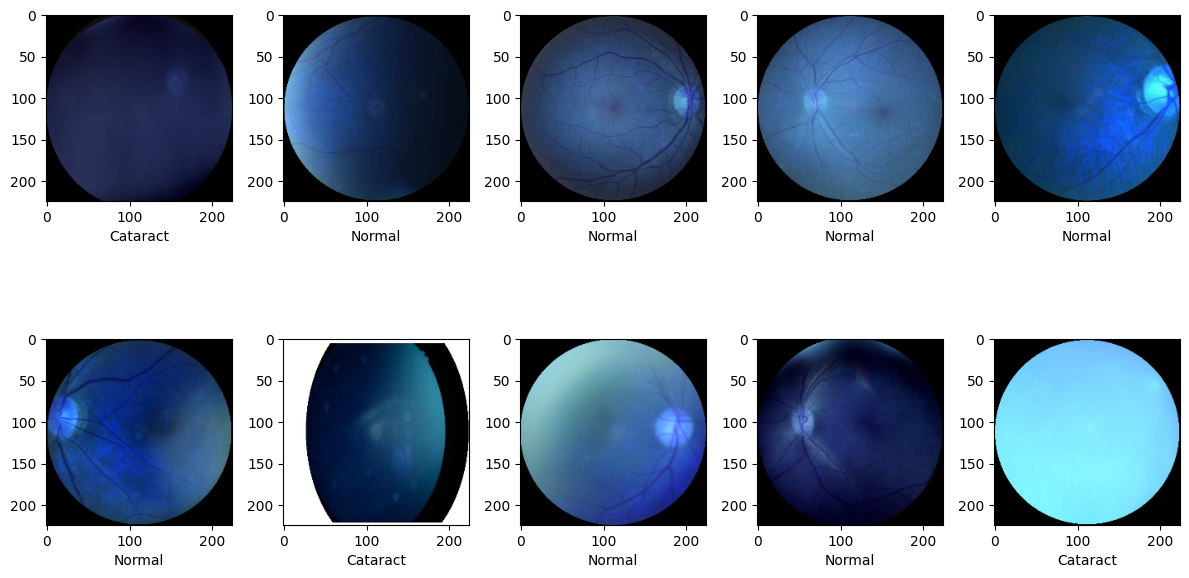

In [ ]:
plt.figure(figsize=(12,7))
for i in range(10):
    sample = random.choice(range(len(dataset)))
    image = dataset[sample][0]
    category = dataset[sample][1]
    if category== 0:
        label = "Normal"
    else:
        label = "Cataract"
    plt.subplot(2,5,i+1)
    plt.imshow(image)
    plt.xlabel(label)
plt.tight_layout()

In [ ]:
x = np.array([i[0] for i in dataset]).reshape(-1,image_size,image_size,3)
y = np.array([i[1] for i in dataset])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model

# Load the EfficientNetB0 model with pre-trained ImageNet weights, excluding the top (classification) layer
efficientnet_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3), pooling='max')

# Freeze the layers in the EfficientNetB0 model (optional)
for layer in efficientnet_model.layers:
    layer.trainable = False

# Add custom classification layers on top of the EfficientNetB0 model
custom_model = Flatten()(efficientnet_model.output)
custom_model = Dense(512, activation='relu')(custom_model)
custom_model = Dropout(0.5)(custom_model)
custom_model = Dense(1, activation='sigmoid')(custom_model)

# Create the final model by specifying the input and output layers
model = Model(inputs=efficientnet_model.input, outputs=custom_model)

# Print the summary of the model
model.summary()



16705208/16705208 [==============================] - 1s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Rescaling)   

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
checkpoint = ModelCheckpoint("EfficientNetB0.h5",monitor="val_acc",verbose=1,save_best_only=True,
                             save_weights_only=False,period=1)
earlystop = EarlyStopping(monitor="val_acc",patience=5,verbose=1)

In [ ]:
# Compile the model with appropriate loss, optimizer, and metrics
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
history = model.fit(x_train,y_train,batch_size=10,epochs=30,validation_data=(x_test,y_test),
                    verbose=1,callbacks=[checkpoint,earlystop])

Epoch 1/30
87/87 [==============================] - ETA: 0s - loss: 0.0360 - accuracy: 0.9874

87/87 [==============================] - 3s 31ms/step - loss: 0.0360 - accuracy: 0.9874 - val_loss: 0.1512 - val_accuracy: 0.9541
Epoch 2/30
85/87 [============================>.] - ETA: 0s - loss: 0.0255 - accuracy: 0.9918

87/87 [==============================] - 2s 25ms/step - loss: 0.0253 - accuracy: 0.9920 - val_loss: 0.1559 - val_accuracy: 0.9450
Epoch 3/30
87/87 [==============================] - ETA: 0s - loss: 0.0370 - accuracy: 0.9885

87/87 [==============================] - 2s 26ms/step - loss: 0.0370 - accuracy: 0.9885 - val_loss: 0.1499 - val_accuracy: 0.9404
Epoch 4/30
85/87 [============================>.] - ETA: 0s - loss: 0.0509 - accuracy: 0.9871

87/87 [==============================] - 2s 25ms/step - loss: 0.0499 - accuracy: 0.9874 - val_loss: 0.1764 - val_accuracy: 0.9633
Epoch 5/30
87/87 [==============================] - ETA: 0s - loss: 0.0842 - accuracy: 0.9713

87/87 [==============================] - 2s 27ms/step - loss: 0.0842 - accuracy: 0.9713 - val_loss: 0.2191 - val_accuracy: 0.9450
Epoch 6/30
86/87 [============================>.] - ETA: 0s - loss: 0.0478 - accuracy: 0.9860

87/87 [==============================] - 3s 32ms/step - loss: 0.0473 - accuracy: 0.9862 - val_loss: 0.1632 - val_accuracy: 0.9495
Epoch 7/30
85/87 [============================>.] - ETA: 0s - loss: 0.0257 - accuracy: 0.9918

87/87 [==============================] - 2s 29ms/step - loss: 0.0293 - accuracy: 0.9908 - val_loss: 0.1879 - val_accuracy: 0.9633
Epoch 8/30
85/87 [============================>.] - ETA: 0s - loss: 0.0186 - accuracy: 0.9953

87/87 [==============================] - 2s 28ms/step - loss: 0.0182 - accuracy: 0.9954 - val_loss: 0.1594 - val_accuracy: 0.9587
Epoch 9/30
85/87 [============================>.] - ETA: 0s - loss: 0.0286 - accuracy: 0.9859

87/87 [==============================] - 2s 26ms/step - loss: 0.0281 - accuracy: 0.9862 - val_loss: 0.2156 - val_accuracy: 0.9587
Epoch 10/30
85/87 [============================>.] - ETA: 0s - loss: 0.0531 - accuracy: 0.9812

87/87 [==============================] - 2s 26ms/step - loss: 0.0519 - accuracy: 0.9816 - val_loss: 0.1517 - val_accuracy: 0.9266
Epoch 11/30
85/87 [============================>.] - ETA: 0s - loss: 0.0202 - accuracy: 0.9953

87/87 [==============================] - 2s 29ms/step - loss: 0.0198 - accuracy: 0.9954 - val_loss: 0.1567 - val_accuracy: 0.9541
Epoch 12/30
85/87 [============================>.] - ETA: 0s - loss: 0.0524 - accuracy: 0.9906

87/87 [==============================] - 2s 28ms/step - loss: 0.0521 - accuracy: 0.9897 - val_loss: 0.1596 - val_accuracy: 0.9404
Epoch 13/30
85/87 [============================>.] - ETA: 0s - loss: 0.0240 - accuracy: 0.9906

87/87 [==============================] - 2s 28ms/step - loss: 0.0235 - accuracy: 0.9908 - val_loss: 0.1914 - val_accuracy: 0.9404
Epoch 14/30
85/87 [============================>.] - ETA: 0s - loss: 0.0416 - accuracy: 0.9835

87/87 [==============================] - 2s 29ms/step - loss: 0.0407 - accuracy: 0.9839 - val_loss: 0.2009 - val_accuracy: 0.9495
Epoch 15/30
85/87 [============================>.] - ETA: 0s - loss: 0.0441 - accuracy: 0.9859

87/87 [==============================] - 2s 26ms/step - loss: 0.0431 - accuracy: 0.9862 - val_loss: 0.1933 - val_accuracy: 0.9450
Epoch 16/30
85/87 [============================>.] - ETA: 0s - loss: 0.0520 - accuracy: 0.9812

87/87 [==============================] - 2s 26ms/step - loss: 0.0514 - accuracy: 0.9816 - val_loss: 0.1666 - val_accuracy: 0.9587
Epoch 17/30
85/87 [============================>.] - ETA: 0s - loss: 0.0261 - accuracy: 0.9882

87/87 [==============================] - 3s 30ms/step - loss: 0.0262 - accuracy: 0.9885 - val_loss: 0.1608 - val_accuracy: 0.9541
Epoch 18/30
85/87 [============================>.] - ETA: 0s - loss: 0.0274 - accuracy: 0.9906

87/87 [==============================] - 3s 30ms/step - loss: 0.0268 - accuracy: 0.9908 - val_loss: 0.1668 - val_accuracy: 0.9450
Epoch 19/30
85/87 [============================>.] - ETA: 0s - loss: 0.0506 - accuracy: 0.9859

87/87 [==============================] - 2s 26ms/step - loss: 0.0494 - accuracy: 0.9862 - val_loss: 0.1618 - val_accuracy: 0.9633
Epoch 20/30
85/87 [============================>.] - ETA: 0s - loss: 0.0406 - accuracy: 0.9882

87/87 [==============================] - 2s 28ms/step - loss: 0.0407 - accuracy: 0.9885 - val_loss: 0.1817 - val_accuracy: 0.9587
Epoch 21/30
85/87 [============================>.] - ETA: 0s - loss: 0.0341 - accuracy: 0.9894

87/87 [==============================] - 2s 28ms/step - loss: 0.0347 - accuracy: 0.9897 - val_loss: 0.2220 - val_accuracy: 0.9587
Epoch 22/30
85/87 [============================>.] - ETA: 0s - loss: 0.0178 - accuracy: 0.9929

87/87 [==============================] - 2s 28ms/step - loss: 0.0176 - accuracy: 0.9931 - val_loss: 0.2187 - val_accuracy: 0.9541
Epoch 23/30
85/87 [============================>.] - ETA: 0s - loss: 0.0470 - accuracy: 0.9824

87/87 [==============================] - 3s 30ms/step - loss: 0.0460 - accuracy: 0.9828 - val_loss: 0.1887 - val_accuracy: 0.9404
Epoch 24/30
85/87 [============================>.] - ETA: 0s - loss: 0.0371 - accuracy: 0.9847

87/87 [==============================] - 3s 30ms/step - loss: 0.0363 - accuracy: 0.9851 - val_loss: 0.2164 - val_accuracy: 0.9633
Epoch 25/30
85/87 [============================>.] - ETA: 0s - loss: 0.0561 - accuracy: 0.9812

87/87 [==============================] - 2s 25ms/step - loss: 0.0550 - accuracy: 0.9816 - val_loss: 0.1387 - val_accuracy: 0.9587
Epoch 26/30
87/87 [==============================] - ETA: 0s - loss: 0.0571 - accuracy: 0.9828

87/87 [==============================] - 3s 32ms/step - loss: 0.0571 - accuracy: 0.9828 - val_loss: 0.1595 - val_accuracy: 0.9495
Epoch 27/30
87/87 [==============================] - ETA: 0s - loss: 0.0262 - accuracy: 0.9920

87/87 [==============================] - 2s 26ms/step - loss: 0.0262 - accuracy: 0.9920 - val_loss: 0.1804 - val_accuracy: 0.9633
Epoch 28/30
85/87 [============================>.] - ETA: 0s - loss: 0.0150 - accuracy: 0.9953

87/87 [==============================] - 2s 26ms/step - loss: 0.0147 - accuracy: 0.9954 - val_loss: 0.2685 - val_accuracy: 0.9266
Epoch 29/30
85/87 [============================>.] - ETA: 0s - loss: 0.0223 - accuracy: 0.9941

87/87 [==============================] - 3s 31ms/step - loss: 0.0242 - accuracy: 0.9931 - val_loss: 0.2234 - val_accuracy: 0.9633
Epoch 30/30
87/87 [==============================] - ETA: 0s - loss: 0.0566 - accuracy: 0.9839

87/87 [==============================] - 3s 29ms/step - loss: 0.0566 - accuracy: 0.9839 - val_loss: 0.1782 - val_accuracy: 0.9587


In [ ]:
loss,Accuracy= model.evaluate(x_test,y_test)
print("loss", loss)
print("Accuracy", Accuracy)

7/7 [==============================] - 0s 63ms/step - loss: 0.1782 - accuracy: 0.9587
loss 0.1781979650259018
Accuracy 0.9587156176567078


In [ ]:
!pip install scikit-learn

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
# Obtain the predicted probability values for the test data
y_pred = model.predict(x_test)

# Convert the predicted probability values to class labels
y_pred = (y_pred > 0.5).astype(int)

7/7 [==============================] - 0s 64ms/step


In [ ]:
accuracy_score(y_test,y_pred)

0.9587155963302753

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       112
           1       0.97      0.94      0.96       106

    accuracy                           0.96       218
   macro avg       0.96      0.96      0.96       218
weighted avg       0.96      0.96      0.96       218



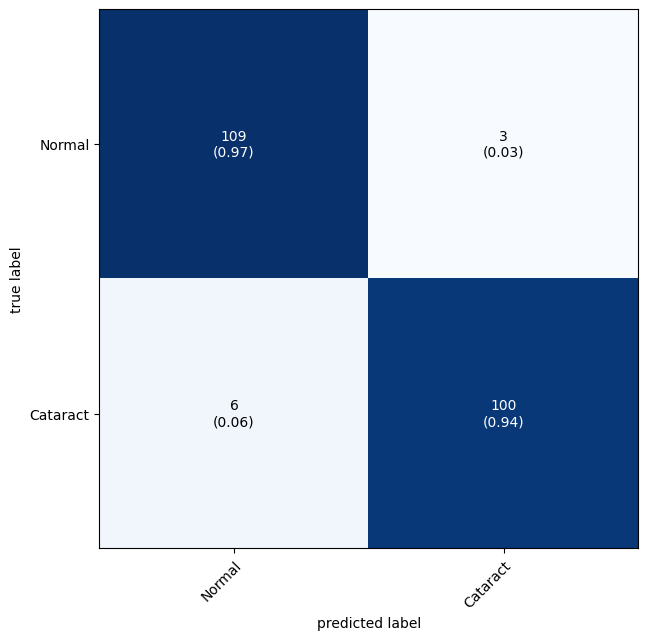

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),class_names = ["Normal","Cataract"],
                      show_normed = True);

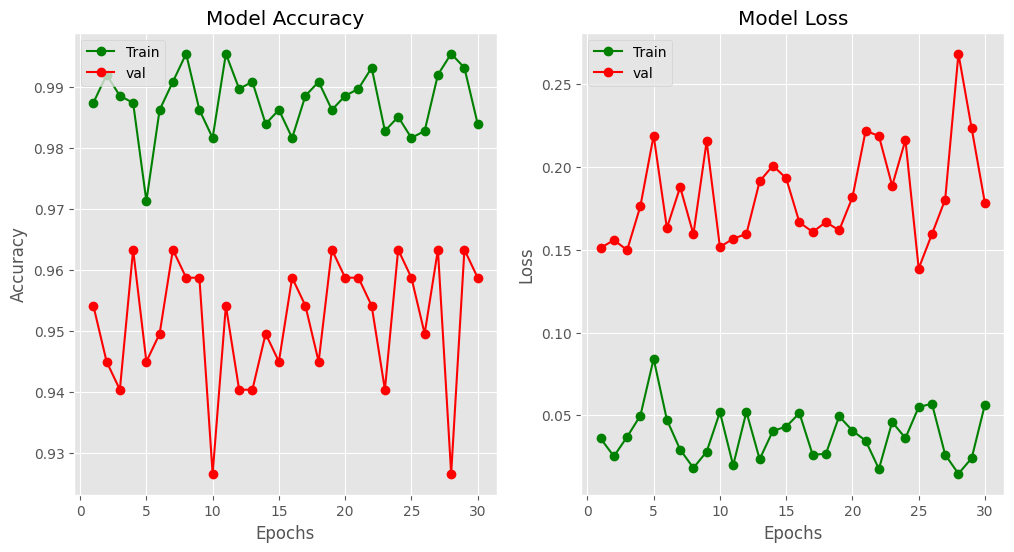

In [ ]:
plt.style.use("ggplot")
fig = plt.figure(figsize=(12,6))
epochs = range(1,31)
plt.subplot(1,2,1)
plt.plot(epochs,history.history["accuracy"],"go-")
plt.plot(epochs,history.history["val_accuracy"],"ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","val"],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,history.history["loss"],"go-")
plt.plot(epochs,history.history["val_loss"],"ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","val"],loc = "upper left")
plt.show()

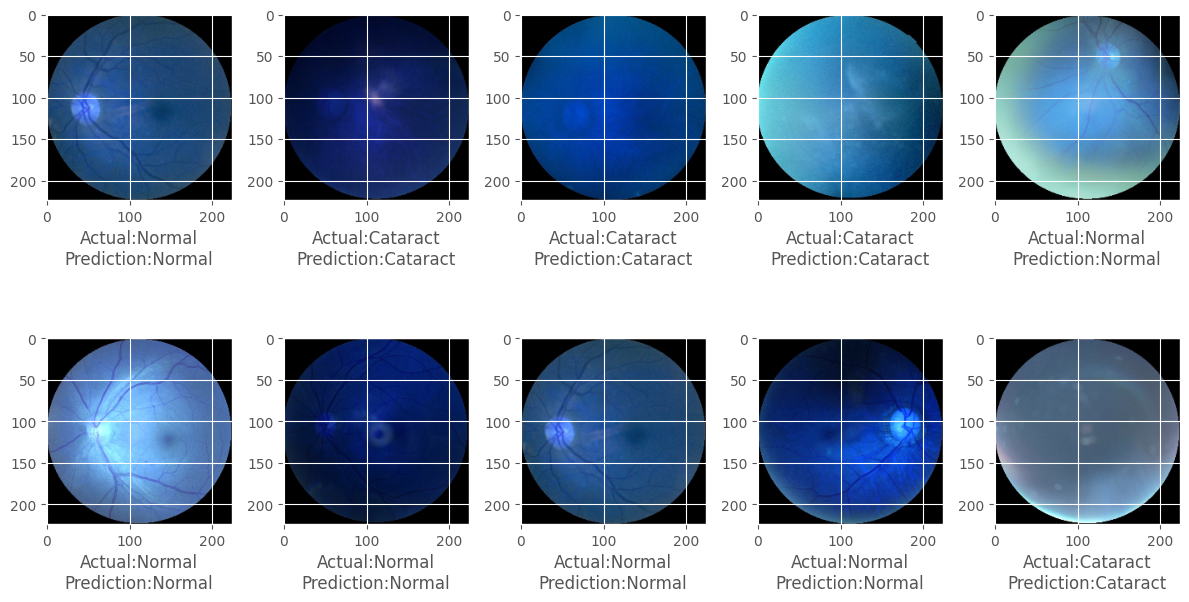

In [ ]:
plt.figure(figsize=(12,7))
for i in range(10):
    sample = random.choice(range(len(x_test)))
    image = x_test[sample]
    category = y_test[sample]
    pred_category = y_pred[sample]

    if category== 0:
        label = "Normal"
    else:
        label = "Cataract"

    if pred_category== 0:
        pred_label = "Normal"
    else:
        pred_label = "Cataract"

    plt.subplot(2,5,i+1)
    plt.imshow(image)
    plt.xlabel("Actual:{}\nPrediction:{}".format(label,pred_label))
plt.tight_layout()